In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
import os  # For directory and file operations
import numpy as np  # For numerical operations and handling image arrays
import random  # For generating random values for augmentation
from PIL import Image, ImageEnhance  # For image processing and enhancement
import pandas as pd


#keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img  # For loading images
from tensorflow.keras.models import Sequential  # For building the model
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense  # For model layers
from tensorflow.keras.optimizers import Adamax  # For optimizer
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.applications import VGG16  # For using VGG16 model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle  # For shuffling the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#Load Datasets


In [ ]:
# Directories for training and testing data
train_dir = '/content/drive/MyDrive/archive/Training/'
test_dir = '/content/drive/MyDrive/archive/Testing/'

# Load and shuffle the train data
train_paths = []
train_labels = []
for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir, label)):
        train_paths.append(os.path.join(train_dir, label, image))
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

# Load and shuffle the test data
test_paths = []
test_labels = []
for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir, label)):
        test_paths.append(os.path.join(test_dir, label, image))
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

In [ ]:
tr_df = pd.DataFrame({'Class Path': train_paths, 'Class': train_labels})
ts_df = pd.DataFrame({'Class Path': test_paths, 'Class': test_labels})

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

#Data Visualization


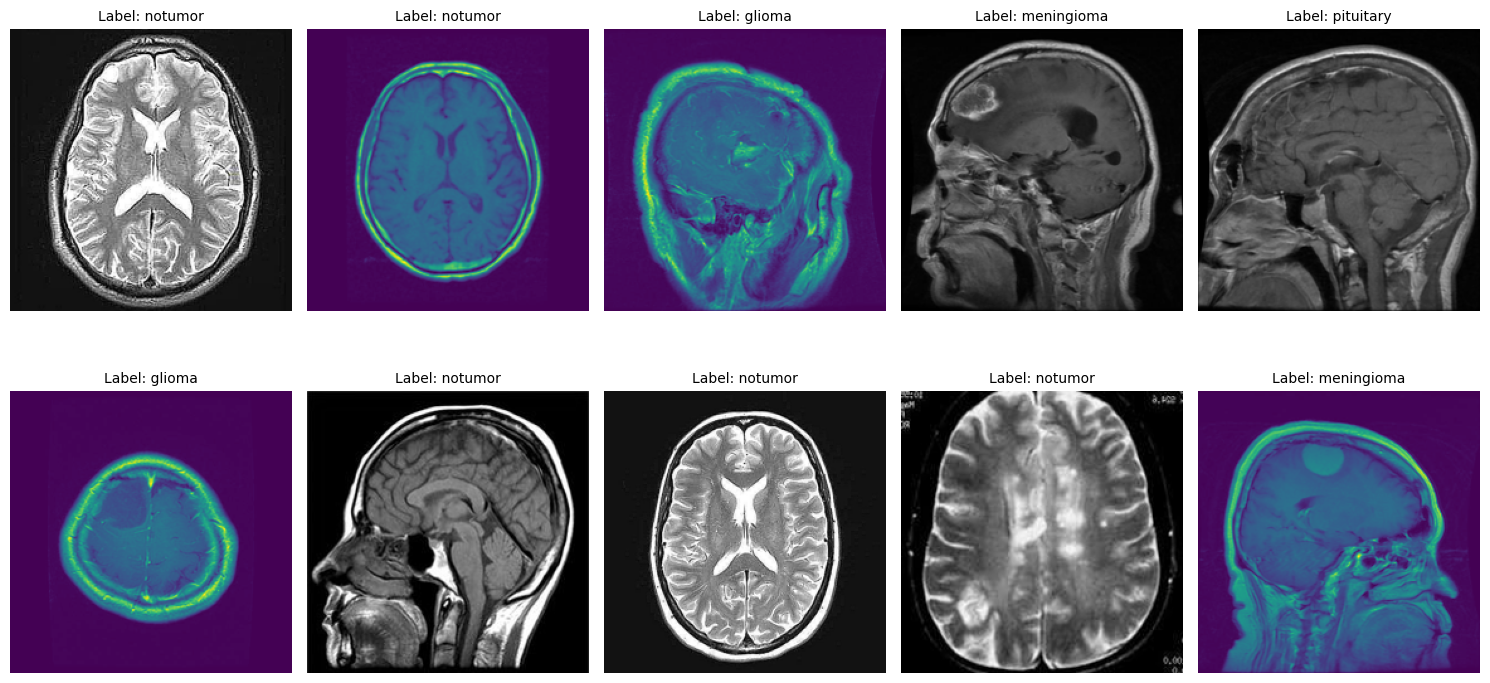

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import os

# Select random indices for 10 images
random_indices = random.sample(range(len(train_paths)), 10)

# Create a figure to display images in 2 rows
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.ravel()

for i, idx in enumerate(random_indices):
    # Load image
    img_path = train_paths[idx]
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize to consistent size

    # Display image
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axis
    # Display class label in the second row
    axes[i].set_title(f"Label: {train_labels[idx]}", fontsize=10)

plt.tight_layout()
plt.show()

#Data Preprocessing



In [ ]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5762 validated image filenames belonging to 4 classes.
Found 670 validated image filenames belonging to 4 classes.
Found 671 validated image filenames belonging to 4 classes.


#MODEL:


In [ ]:
# Model architecture
img_shape=(299,299,3)

base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')


# Build the final model
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

# Compile the model
model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

# Train the model
history = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


181/181 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.6749 - loss: 0.8783 - precision: 0.7988 - recall: 0.4840 - val_accuracy: 0.8478 - val_loss: 0.4342 - val_precision: 0.8483 - val_recall: 0.8433
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 144s 793ms/step - accuracy: 0.9741 - loss: 0.0870 - precision: 0.9768 - recall: 0.9723 - val_accuracy: 0.9448 - val_loss: 0.1372 - val_precision: 0.9446 - val_recall: 0.9418
Epoch 3/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 144s 792ms/step - accuracy: 0.9909 - loss: 0.0254 - precision: 0.9910 - recall: 0.9907 - val_accuracy: 0.9881 - val_loss: 0.0414 - val_precision: 0.9881 - val_recall: 0.9881
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 143s 791ms/step - accuracy: 0.9968 - loss: 0.0190 - precision: 0.9968 - recall: 0.9964 - val_accuracy: 0.9866 - val_loss: 0.0632 - val_precision: 0.9866 - val_recall: 0.9866
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 144s 794ms/step - accuracy: 0.9952 - loss: 0.0259 - precision: 0.9955 - recall: 0.9949 - val_accuracy: 0.9866 - val_lo

#Train and Val Plots


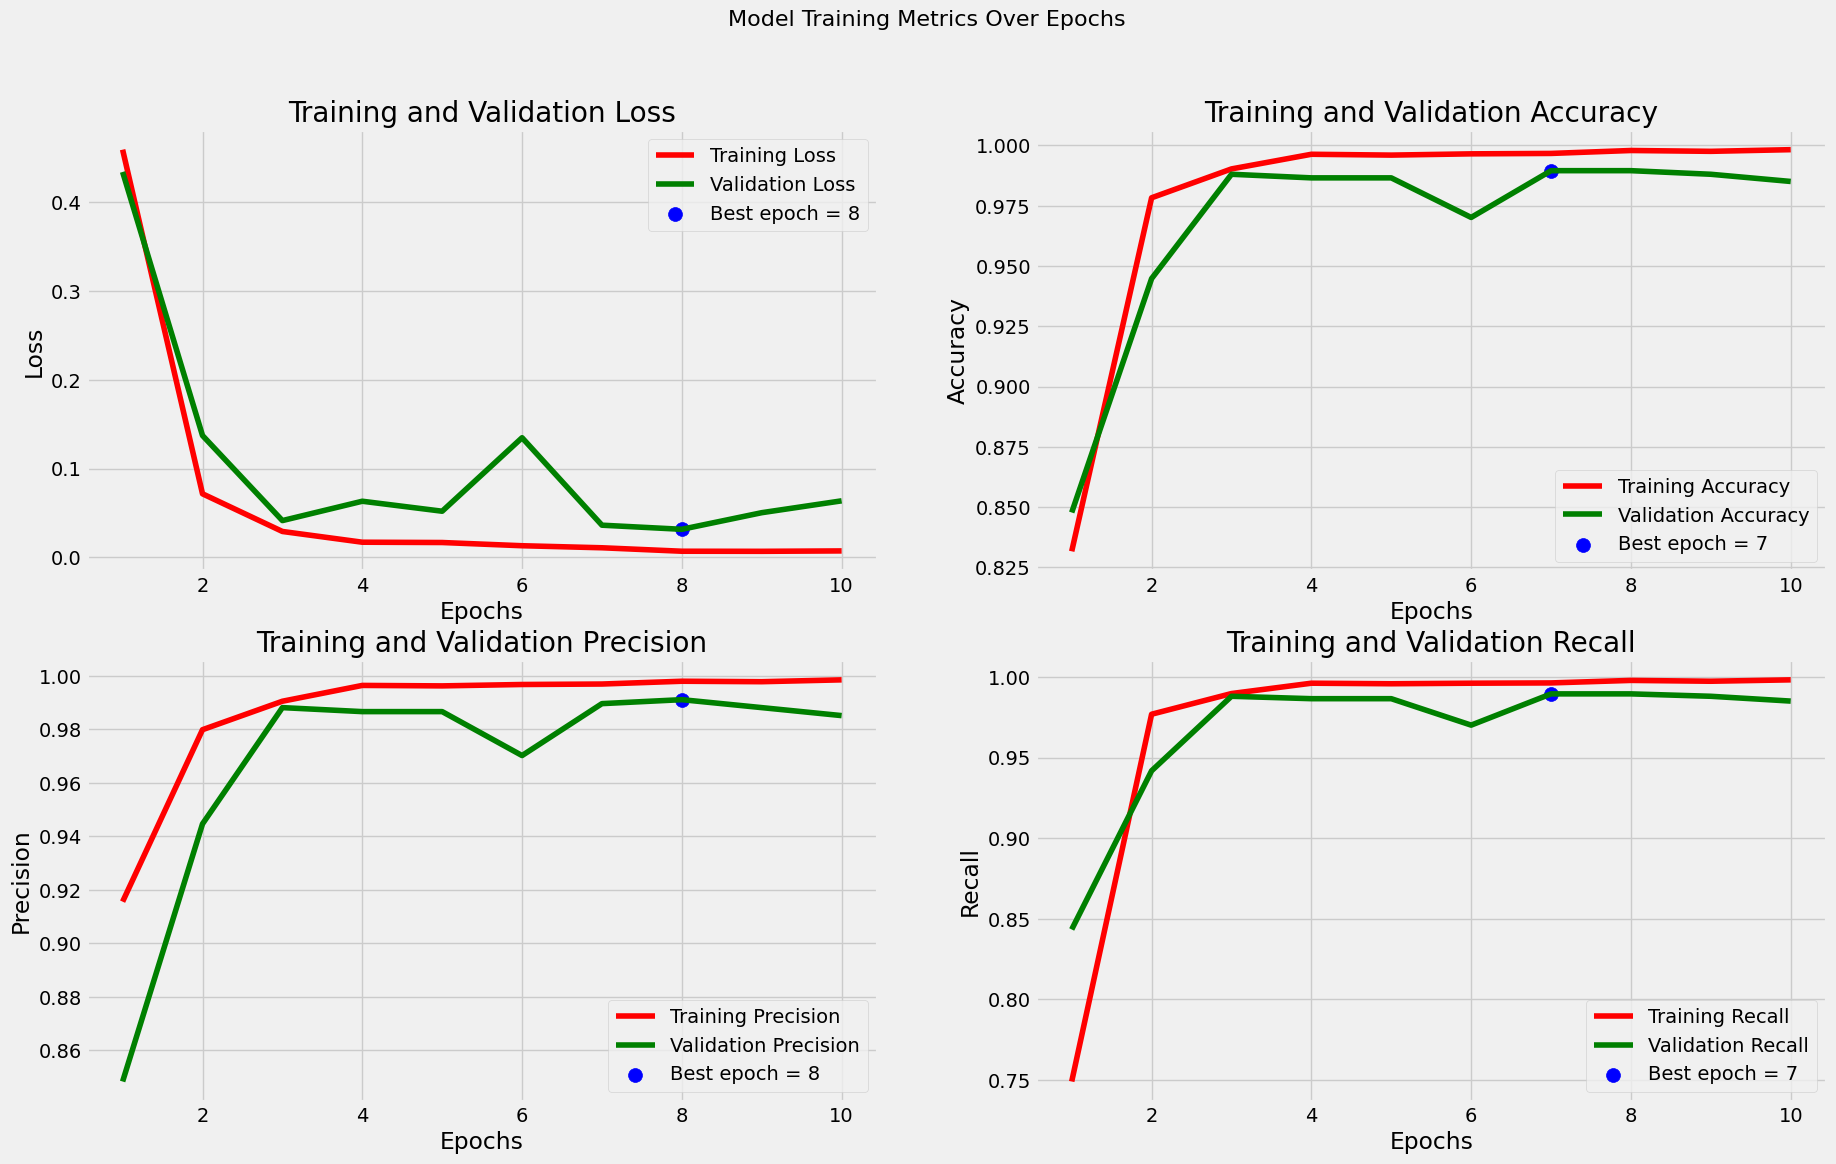

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Extract metrics from history
metrics = {
    'Loss': (history.history['loss'], history.history['val_loss']),
    'Accuracy': (history.history['accuracy'], history.history['val_accuracy']),
    'Precision': (history.history['precision'], history.history['val_precision']),
    'Recall': (history.history['recall'], history.history['val_recall'])
}

# Find best epochs
best_epochs = {
    'Loss': np.argmin(metrics['Loss'][1]) + 1,
    'Accuracy': np.argmax(metrics['Accuracy'][1]) + 1,
    'Precision': np.argmax(metrics['Precision'][1]) + 1,
    'Recall': np.argmax(metrics['Recall'][1]) + 1
}

# Plot settings
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
Epochs = range(1, len(metrics['Loss'][0]) + 1)

# Plot metrics
for i, (metric, (tr, val)) in enumerate(metrics.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(Epochs, tr, 'r', label=f'Training {metric}')
    plt.plot(Epochs, val, 'g', label=f'Validation {metric}')
    best_epoch = best_epochs[metric]
    best_value = val[best_epoch - 1]
    plt.scatter(best_epoch, best_value, s=100, c='blue', label=f'Best epoch = {best_epoch}')
    plt.title(f'Training and Validation {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

#Model Classification Report


In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

181/181 ━━━━━━━━━━━━━━━━━━━━ 56s 307ms/step - accuracy: 0.9967 - loss: 0.0071 - precision: 0.9967 - recall: 0.9967
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.9826 - loss: 0.0815 - precision: 0.9826 - recall: 0.9826
42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 386ms/step - accuracy: 0.9830 - loss: 0.0486 - precision: 0.9830 - recall: 0.9830
Train Loss: 0.0093
Train Accuracy: 99.64%
--------------------
Validation Loss: 0.0631
Validation Accuracy: 98.66%
--------------------
Test Loss: 0.0284
Test Accuracy: 98.96%


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step


In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       150
           1       0.96      1.00      0.98       153
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       165

    accuracy                           0.99       671
   macro avg       0.99      0.99      0.99       671
weighted avg       0.99      0.99      0.99       671



#Model Confusion Plot


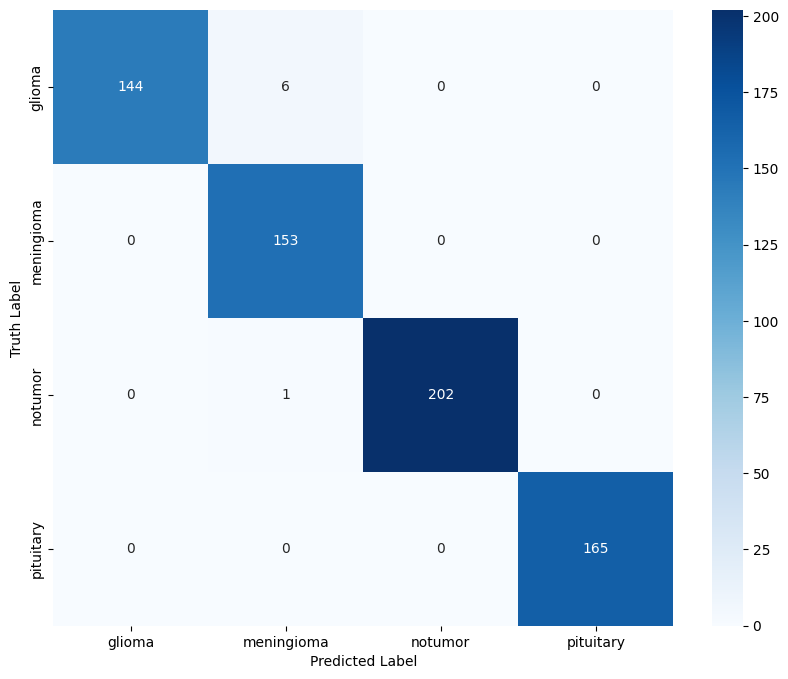

In [ ]:
class_dict = tr_gen.class_indices
conf_matrix = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

#Save & Load Model


In [ ]:
# Save the entire model
model.save('my_model.keras')

In [ ]:
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model('my_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 160 variables whereas the saved optimizer has 318 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


#MRI Tumor Detection System


In [ ]:
def predict(img_path):
    label = list(class_dict.keys())
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)

    predicted_class_index = np.argmax(predictions, axis=1)[0]
    confidence_score = np.max(predictions, axis=1)[0]


    # Determine the class
    if label[predicted_class_index] == 'notumor':
        result = "No Tumor"
    else:
        result = f"Tumor: {label[predicted_class_index]}"

    # Display the image with the prediction
    plt.imshow(load_img(img_path))
    plt.axis('off')
    plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


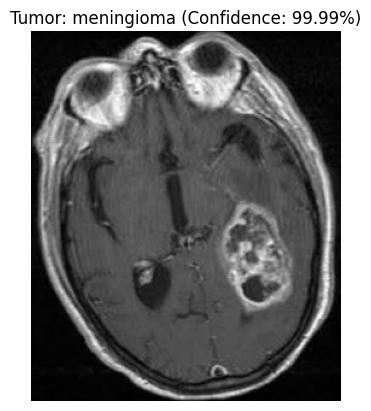

In [ ]:
image_path = '/content/drive/MyDrive/archive/Testing/meningioma/Te-meTr_0001.jpg'
predict(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


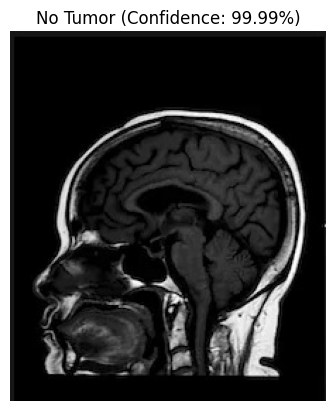

In [ ]:
image_path = '/content/drive/MyDrive/archive/Testing/notumor/Te-noTr_0004.jpg'
predict(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


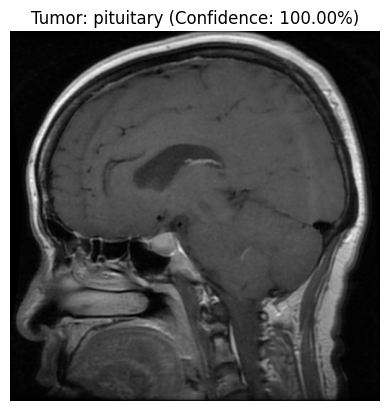

In [ ]:
image_path = '/content/drive/MyDrive/archive/Testing/pituitary/Te-piTr_0003.jpg'
predict(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


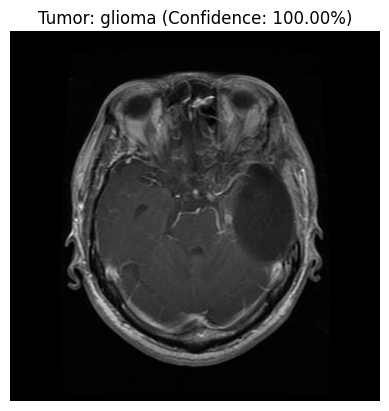

In [ ]:
image_path = '/content/drive/MyDrive/archive/Testing/glioma/Te-gl_0015.jpg'
predict(image_path)